In [162]:
import pandas as pd
import numpy as np
from math import cos, sin, pi
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Before we get into this data science prediciton, I would like to go over collection and analysis methods. To score the applicants, I have included their high school top 6 average, their AIF prestige, uniqueness and contests scores to quantify their admission score. I will plot the findings in a chart below.
My hypothesis is that as averages heighten, the line of acceptance will go lower and lower for the AIF score, as the AIF becomes less and less important. This is to quantify how important the AIF is. I will also score it upon the individual metrics to see what universities value in comparison to the total trend line.


In [163]:
math_id = '1_5TldRoNvMhtR-7pmAWBWEuzpWPEbe4a38Vkr9DIhwk'
cs_id = '16U9JiyNum_qxv7zhBYHGD3jcUwBt2L9Y7SPNJ4-gICQ'
csr_id = '1e_u04Qm1kP7T7yL2Kn7_7DFZKOiSzxN_71ppPRjolLM'
MathData = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{math_id}/export?format=csv")
CSData = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{cs_id}/export?format=csv")
CSrejects = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{csr_id}/export?format=csv")

In [164]:
CSData

,Name,Average,AIF,Uniqueness,Contests,Total Score
0,Anunya Kapur,96.83,4.5,3.0,3.5,11.0
1,Adam Selim,97.50,5.0,4.5,3.5,13.0
2,Brian Xie,97.00,5.0,2.0,3.5,10.5
3,Hanz Nathan Po,98.00,4.0,3.0,4.5,11.5
4,Dylan Dai,96.50,5.0,4.0,5.0,14.0
5,Matthew Yang,99.50,5.0,3.0,4.5,12.5
6,Juicy Fruit,97.17,3.5,3.0,4.0,10.5
7,Ethan Zhu,98.33,4.5,3.5,4.0,12.0
8,Aaysuh Grover,98.67,4.0,3.0,4.0,11.0
9,Kabir Jain,97.33,4.5,4.5,3.5,12.5


In [165]:
CSrejects

,Name,Average,AIF,Uniqueness,Contests,TotalAifScore
0,Chungus 2099,97.83,3.5,2.0,3.0,8.5
1,Sambhav Athreya,98.67,5.0,3.0,1.5,9.5
2,James Fan,95.17,4.5,3.0,4.0,11.5
3,UpBeat Mullbery,97.50,3.5,2.5,3.5,9.5
4,Samir Sharma,94.00,4.0,3.5,2.5,10.0
5,Alexandru Stan,92.67,4.5,4.0,3.5,12.0


In [166]:
MathData

,Name,Average,AIF,Uniqueness,Contests,Total Score,Admitted
0,Will Xie,98.00,4.0,3.0,4.5,11.5,Y
1,Andi Tse,95.33,4.0,3.0,4.5,11.5,Y
2,James Fan,96.00,4.0,4.0,3.5,11.5,Y
3,Nandan Srivatsa,95.83,3.5,4.0,2.5,10.0,Y
4,Krish Chetan,94.00,4.0,4.5,1.0,9.5,Y
5,Alex Wang,94.83,4.0,4.0,3.0,11.0,Y
6,Gurmukh Sangha,93.17,4.5,3.5,3.0,11.0,Y
7,Alexandru Stan,92.67,4.5,3.0,3.5,11.0,Y
8,Kale Mazh,95.00,3.0,3.0,4.5,10.5,Y
9,Michella Poon,97.00,3.5,3.5,2.5,9.5,Y


In [167]:
X = CSData['Average']
y = CSData['Total Score']
Xb = CSrejects['Average']
yb = CSrejects['TotalAifScore']

(7.0, 18.0)

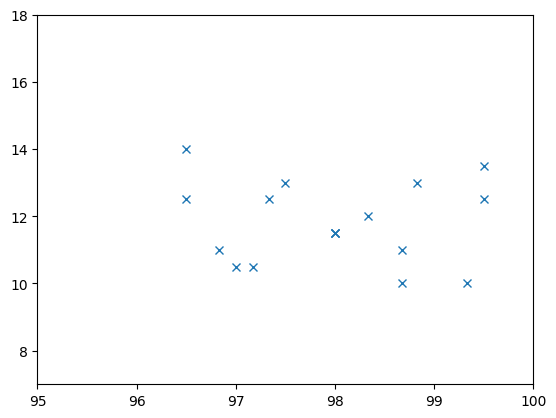

In [168]:
plt.plot(X, y, 'x')
plt.xlim(95, 100)  # X-axis range from 0 to 5
plt.ylim(7, 18) # Y-axis range from 0 to 20
# FOR COMPUTER SCIENCE ADMITS

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1, random_state = 23)

In [170]:
  X_train = np.array(X_train).reshape(-1, 1)
  X_train

array([[98.67],
       [97.  ],
       [97.5 ],
       [96.5 ],
       [99.5 ],
       [99.33],
       [98.  ],
       [98.  ],
       [92.  ],
       [98.33],
       [98.83],
       [96.5 ],
       [99.5 ],
       [98.  ],
       [90.67],
       [97.33],
       [98.67],
       [97.17]])

In [171]:
X_test = np.array(X_test).reshape(-1, 1)
X_test

array([[96.83]])

In [172]:
lr = LinearRegression()

In [173]:
lr.fit(X_train, y_train)

LinearRegression()

In [174]:
c = (lr.intercept_)
c

69.31943998059101

In [175]:
m = (lr.coef_)
m

array([-0.58564083])

In [176]:
Y_pred_train = m*X_train + c
Y_pred_train

array([[11.53425895],
       [12.51227914],
       [12.21945873],
       [12.80509956],
       [11.04817706],
       [11.147736  ],
       [11.92663831],
       [11.92663831],
       [15.44048331],
       [11.73337684],
       [11.44055642],
       [12.80509956],
       [11.04817706],
       [11.92663831],
       [16.21938562],
       [12.31901767],
       [11.53425895],
       [12.4127202 ]])

In [177]:
y_pred_train1 = lr.predict(X_train)
y_pred_train1

array([11.53425895, 12.51227914, 12.21945873, 12.80509956, 11.04817706,
       11.147736  , 11.92663831, 11.92663831, 15.44048331, 11.73337684,
       11.44055642, 12.80509956, 11.04817706, 11.92663831, 16.21938562,
       12.31901767, 11.53425895, 12.4127202 ])

Text(0, 0.5, 'AIF')

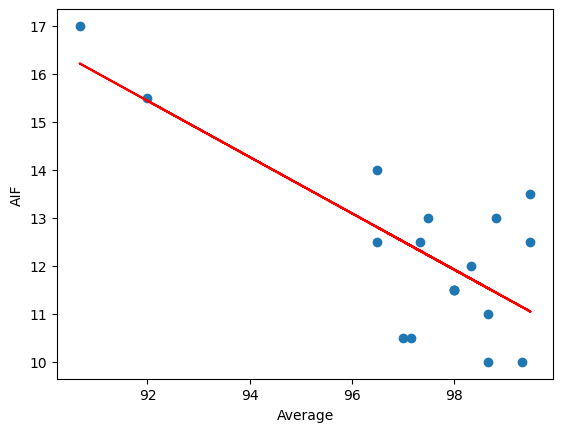

In [178]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train1, color = 'red')
plt.xlabel('Average')
plt.ylabel('AIF')


In [179]:
point1 = m * 90 + c
point1

array([16.61176498])

In [180]:
point2 =  m*100 + c
point2

array([10.75535664])

(7.0, 18.0)

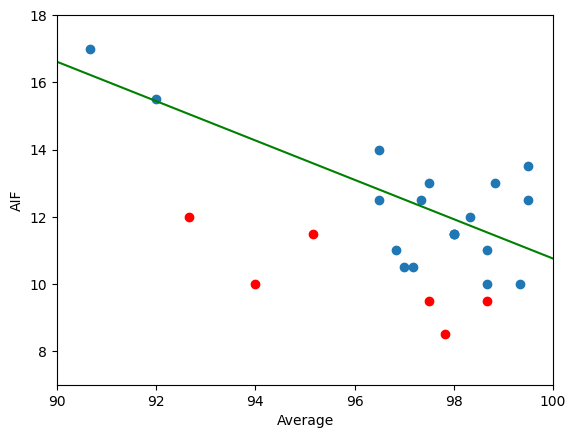

In [181]:
plt.plot(X, y, 'o')
plt.plot(Xb, yb, 'o', color = 'red')

point1 = [90, point1]
point2 = [100, point2]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color='green')

plt.xlabel('Average')
plt.ylabel('AIF')
plt.xlim(90, 100)  # X-axis range from 0 to 5
plt.ylim(7, 18) # Y-axis range from 0 to 20

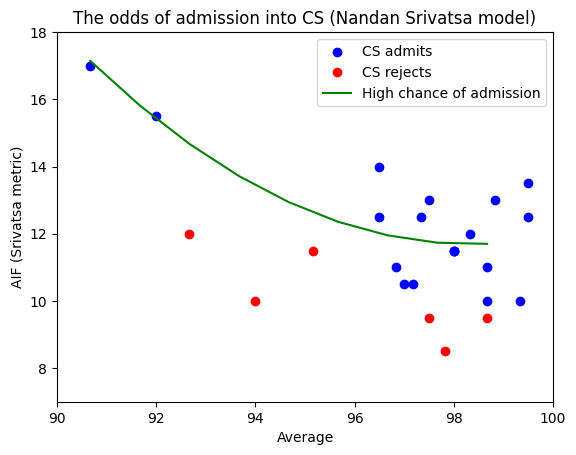

In [182]:
from scipy.optimize import curve_fit
from numpy import arange

xData = CSData['Average']
yData = CSData['Total Score']

def map_func(x, a, b, c):
  comp = a* x + b * x**2 + c
  return comp

opt_param, _ = curve_fit(map_func, xData, yData)
a, b, c = opt_param

plt.scatter(xData, yData, color = 'blue', label = 'CS admits')
plt.plot(Xb, yb, 'o', color = 'red', label = 'CS rejects')

x_line = arange(min(xData), max(xData), 1)
y_line = map_func(x_line, a, b, c)

plt.plot(x_line, y_line, color = 'green', label='High chance of admission')

plt.xlabel('Average')
plt.ylabel('AIF (Srivatsa metric)')
plt.xlim(90, 100)  # X-axis range from 0 to 5
plt.ylim(7, 18) # Y-axis range from 0 to 20

plt.title("The odds of admission into CS (Nandan Srivatsa model)")

plt.legend()

plt.show()